<a href="https://colab.research.google.com/github/dmunger27/dental-xray-segmentation/blob/main/Data_Preprocessing_and_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing and Exploration


*   [Pull in Images from S3](#pull)
*   [Display Images with and Without Masks](#display)
*   Preprocess Images
*   Image Augmentation
*   Image EDA



<a name="pull"></a>
## Pull in Images from S3

In [ ]:
#!pip install cloudpathlib
#!pip install boto3

In [47]:
import os
import pandas as pd
import numpy as np
from cloudpathlib import CloudPath
from cloudpathlib import S3Client
import matplotlib.pyplot as plt
import boto3
import glob
import re

In [3]:
# Set environment variables
key_data = pd.read_csv('rootkey.csv')
#os.environ['AWS_ACCESS_KEY'] = 'Set access key'
#os.environ['AWS_SECRET_KEY'] = 'Set secret key'

In [4]:
# Create files in local storage for x-ray data

def gatherS3Data(s3_path, folder_name):
  s3_client = S3Client(aws_access_key_id=os.getenv('AWS_ACCESS_KEY'), aws_secret_access_key=os.getenv('AWS_SECRET_KEY'))
  x_rays_images = s3_client.CloudPath(s3_path)
  x_rays_images.download_to(folder_name)

gatherS3Data('s3://ads-599-capstone-data/ads-599-team7/Dental X-rays tooth annotations/', 'annotation_images')
gatherS3Data('s3://ads-599-capstone-data/ads-599-team7/Dental X-rays/', 'original_images')
gatherS3Data('s3://ads-599-capstone-data/ads-599-team7/Numpy Annotations/', 'numpy_annotations')

<a name="display"></a>
## Display Images with and Without Masks

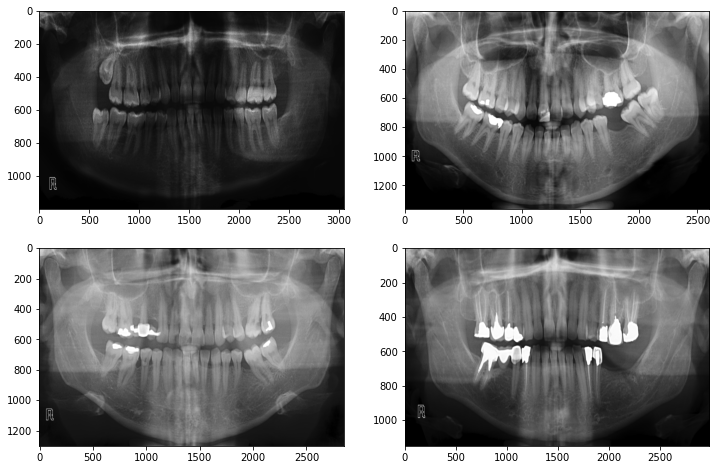

In [33]:
# Make a list of all original image files
def image_to_plot(folder, cmap):
  file_list = glob.glob(folder)
  image_list = [plt.imread(i) for i in file_list]
  # Display 4 original x_ray images in grayscale
  fig, axes = plt.subplots(2, 2, figsize=(12, 8))
  for i in range(2):
    for j in range(2):
      axes[i,j].imshow(image_list[i+j*2], cmap=cmap, aspect='auto')
  plt.show()

image_to_plot('original_images/*', 'gray')

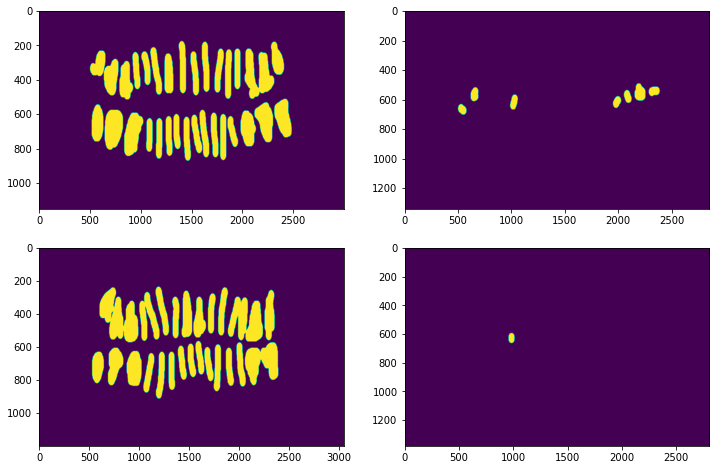

In [34]:
# Display 4 annotation images (just the annotations)
image_to_plot('annotation_images/*', 'viridis')

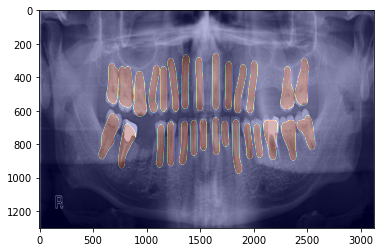

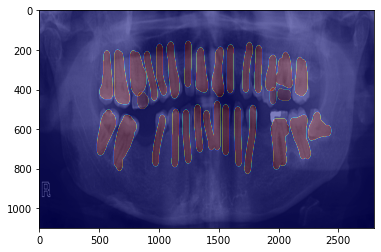

In [124]:
# Superimpose masks over images, display 4 examples
# Original images
originals = sorted(glob.glob('original_images/*'))
# Get image number from each original image (first number)
img_number = [re.search(r'\d+', i)[0] for i in originals]
# Join original and annotated images
all_imgs = originals + sorted(glob.glob('annotation_images/*')) 
# Check if image number is in each string and create a dictionary
image_dict = {}
for i in range(len(img_number)):
  img_list = []
  for j in range(len(all_imgs)):
    if re.search(img_number[i], all_imgs[j]) is not None:
      img_list.append(all_imgs[j])
  image_dict[img_number[i]] = img_list

# Retrieve keys
keys = [key for key in image_dict]
colors = ['gray'] + ['jet']*10
alpha = [1] + [0.3]*10
#Display images
for i in range(1, 3):
  imgs = image_dict[keys[i]]
  for j in range(len(imgs)):
    plt.imshow(plt.imread(imgs[j]), cmap=colors[j], alpha=alpha[j], aspect='auto')
  plt.show()